# Домашнее задание №11

## Задание 1

Подготовить тестовое изображение в градациях серого.

In [1]:
import cv2
import numpy as np
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1BAfXRn9iABIXm8PvGkKoZBHdKJlN-XqN&export=download'
src_image = skimage.io.imread(src_image_url)
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

## Задание 2

Найти углы методом FAST и отобразить их красным цветом (cv.drawKeypoints).

In [2]:
fast = cv2.FastFeatureDetector_create(threshold=20)
key_points = fast.detect(gray_image)
fast_image = cv2.drawKeypoints(gray_image, key_points, None, color=(255, 0, 0))

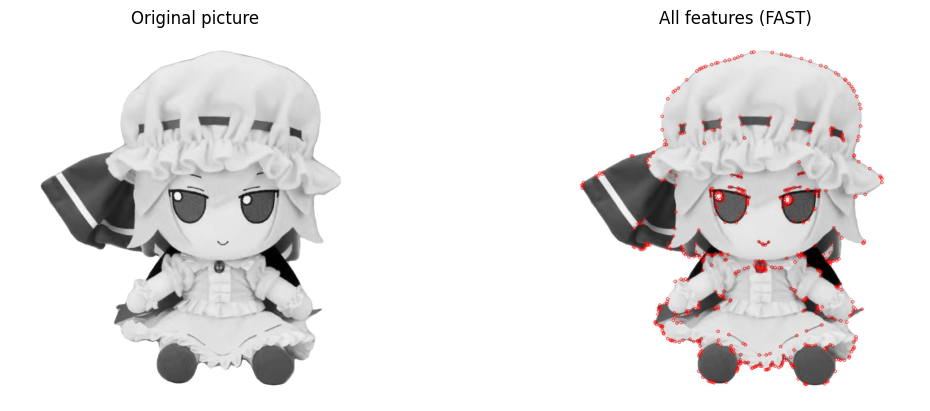

In [3]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original picture")

plt.subplot(1, 2, 2)
plt.imshow(fast_image, cmap='gray')
plt.axis("off")
plt.title("All features (FAST)");

## Задание 3

Найти углы методом Харриса (cv.cornerHarris) и отобразить их синим цветом.

In [4]:
block_size = 5
ksize = 3
harr_param = 0.01
p_value = 0.01

dst = cv2.cornerHarris(gray_image, block_size, ksize, harr_param)
harris_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
harris_image[dst > p_value * dst.max()] = (0, 0, 255)

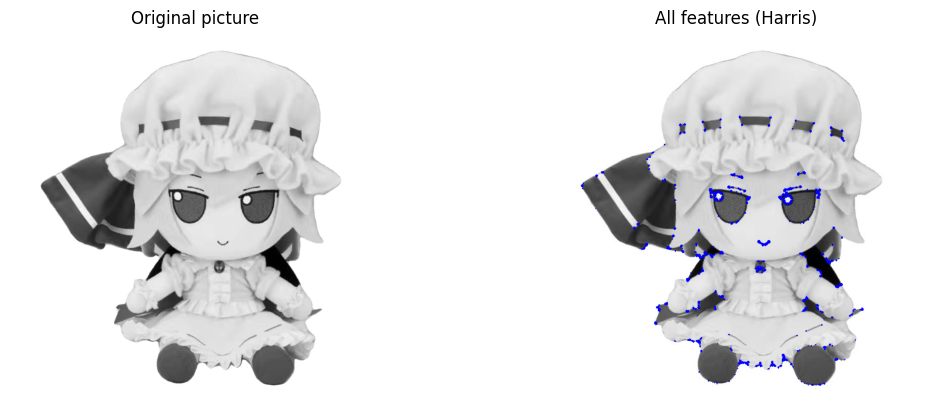

In [5]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original picture")

plt.subplot(1, 2, 2)
plt.imshow(harris_image, cmap='gray')
plt.axis("off")
plt.title("All features (Harris)");

## Задание 4

Найти особые точки и вывести дескрипторы для первых 5 из них, используя ORB (cv.ORB).

In [6]:
n = 5

orb = cv2.ORB_create()
key_points = orb.detect(gray_image, None)
key_points, descriptors = orb.compute(gray_image, key_points)

for i in range(n):
    print(f"Key point: {key_points[i].pt}")
    print(f"Its descriptors: {descriptors[i]}")
    print()

Key point: (541.0, 480.0)
Its descriptors: [ 49  95 107 206 124 135 207 244 196  72 252 102 115 221 181  96 126 248
  22 238 201 163  62 191 114 173 167 136 127 187 112 249]

Key point: (603.0, 500.0)
Its descriptors: [ 45 111  89 103 244  14 111 184 113 232 126  76 211  97 145  48  30 236
  68 110 233 178 237  46 238 237  37 128 111 250  66 161]

Key point: (357.0, 350.0)
Its descriptors: [161 237  83  73 212 143 231 247 117   0 108  64  19  17 180  52  88 184
   2 120 251 184 112  31  45 156   4  68 123 136 194 168]

Key point: (356.0, 361.0)
Its descriptors: [ 49 193  97  77  20  15 199 116  68  32 234  74 243  17 148  36  88 168
  18 110 201 178 117  29  37 140 128  16 121 186  80 168]

Key point: (495.0, 359.0)
Its descriptors: [130  90   6 159 111 144 186  64 159  72  82 247 172 222  55 205 238  41
 179 199 166 158   2 253   4  50 218 139  30  13  57 223]



### Выполнил: Лежнин Максим Витальевич